In [55]:
# Exploratory Data Analysis Assignment 
# Haberman Dataset, Source: Kaggle

In [56]:
# From Haberman Dataset, we have data collected over the span of 12 years between 1958 to 1970
# There are three features whichi includes age of the patient, year of operation, number of positive axillary nodes
# There is one predictor value which is Survival status (
# Survival status 1 = patient survived more than 5 years/longer ,2 = patient dies with in 5 years)

# Objective:
# To predict whether the patient will survive after 5 years or not based upon the age,year of opertaion,axillary nodes

In [57]:
#importing librararies 

import pandas as pd              # Pandas extensively used for loading datasets and creating data frames from dataset
import seaborn as sns            # Data visualization library based upon matplotlib
import matplotlib.pyplot as plt  # Python 2D plotting library
import numpy as np               # NumPy is the fundamental package for scientific computing with Python

#Loading the dataset using pandas library 
Haberman_data = pd.read_csv('haberman.csv',header=None, names=['Age','year_of_operation','positive_lymph_nodes','survival_status_after_5_years']) 
Haberman_data.head()   # prints heads nodes of DataFrame


,Age,year_of_operation,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [58]:
#Survival status denoted as numerical values in the dataset, for better understanding changed from numeric values to 
# category type (1 = yes,2 = no)
Haberman_data['survival_status_after_5_years'] = Haberman_data['survival_status_after_5_years'].map({1:"yes", 2:"no"})
Haberman_data['survival_status_after_5_years'] = Haberman_data['survival_status_after_5_years'].astype('category')
Haberman_data.head()

,Age,year_of_operation,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [59]:
Haberman_data.shape  # prints dimension of DataFrame in terms of rows and columns

(306, 4)

In [60]:
Haberman_data.columns  # prints columns of DataFrame

Index(['Age', 'year_of_operation', 'positive_lymph_nodes',
       'survival_status_after_5_years'],
      dtype='object')

In [61]:
Haberman_data.describe()

#From below data, average (mean) survival rate of patients age is around 52(50% percentile)
# patients are between min age of 30 and max age of 83
# max lymph nodes are 52 and minimum 0

,Age,year_of_operation,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [62]:
Haberman_data["survival_status_after_5_years"].value_counts()
# Data looks like imbalanced, patients who survived more than 5 years are 225 
# patients who die with in 5 years are 81

yes    225
no      81
Name: survival_status_after_5_years, dtype: int64

In [63]:
Haberman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                              306 non-null int64
year_of_operation                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB


C:\Users\shiva_kv\AppData\Local\Continuum\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\shiva_kv\AppData\Local\Continuum\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


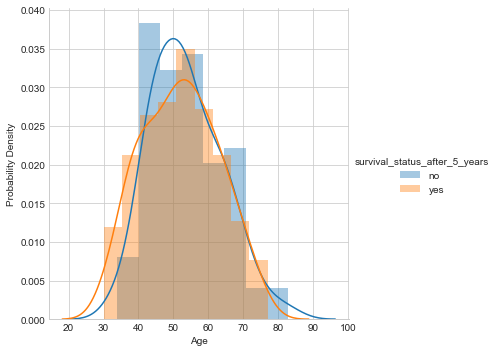

In [64]:
# Univariate Analysis 
# Probability Density Function
sns.FacetGrid(Haberman_data,hue='survival_status_after_5_years',size = 5).map(sns.distplot,'Age').add_legend()
plt.ylabel('Probability Density')
plt.show()

C:\Users\shiva_kv\AppData\Local\Continuum\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\shiva_kv\AppData\Local\Continuum\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


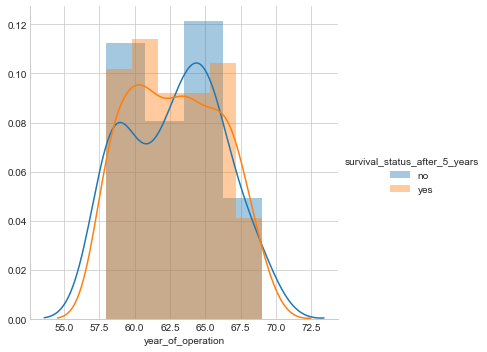

In [65]:
sns.FacetGrid(Haberman_data,hue='survival_status_after_5_years',size = 5).map(sns.distplot,'year_of_operation').add_legend()
plt.show()

C:\Users\shiva_kv\AppData\Local\Continuum\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\shiva_kv\AppData\Local\Continuum\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


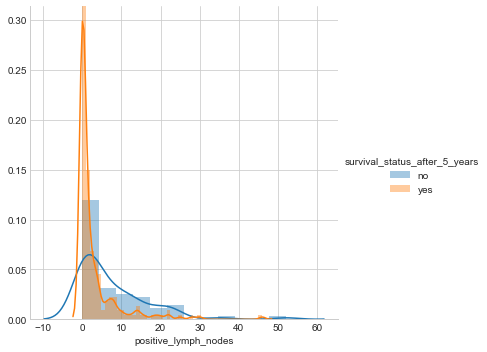

In [66]:
#PDF of positive_axillary_nodes

sns.FacetGrid(Haberman_data,hue='survival_status_after_5_years',size = 5).map(sns.distplot,'positive_lymph_nodes').add_legend()
plt.show()

In [67]:
#Observations:
# The above PDF's Describes probability density of survival status of patients based upon age, year of operation, positive_axillary_nodes
# features are overlapped massively 
# from PDF of positive_lymph_nodes, more than 50% of patients survived who had lymph_nodes between 0 to 5 and around 11-12% of
# patients who had more than 5 nodes

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


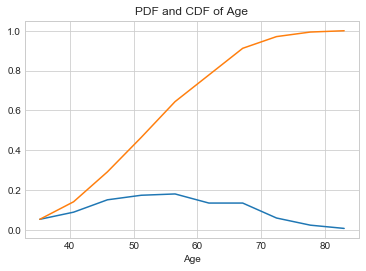

In [68]:
#CDF

counts, bin_edges = np.histogram(Haberman_data["Age"],bins = 10,density=True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.title("PDF and CDF of Age")
plt.xlabel("Age")
plt.ylabel("")
plt.show()

[0.18716578 0.08318479 0.07724302 0.06833036 0.08912656 0.09209745
 0.08318479 0.08318479 0.07427213 0.07130125]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


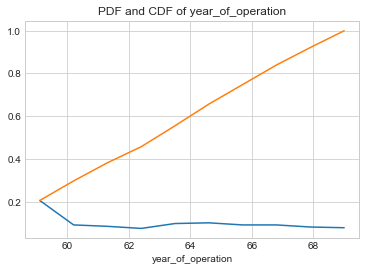

In [69]:
counts, bin_edges = np.histogram(Haberman_data["year_of_operation"],bins=10,density=True)

print(counts)
print(bin_edges)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('year_of_operation')
plt.title("PDF and CDF of year_of_operation")
plt.show()

[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


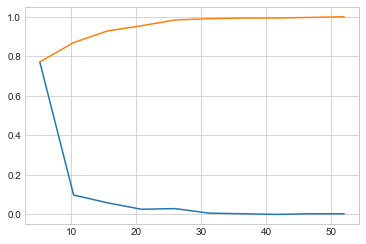

In [70]:
counts, bin_edges = np.histogram(Haberman_data["positive_lymph_nodes"],bins=10,density=True)

print(counts)
print(bin_edges)
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()


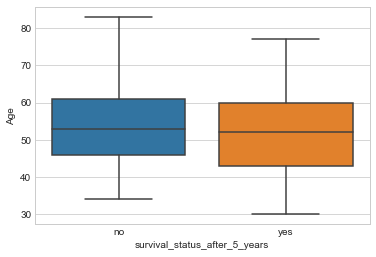

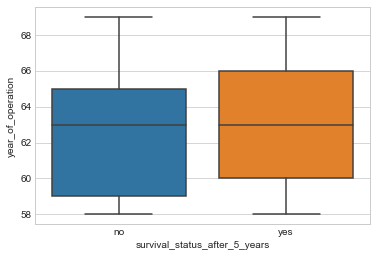

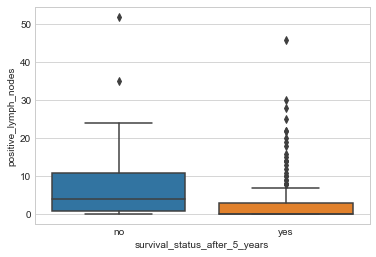

In [71]:
#BoX Plots

# Used to get 25th,50th,75th percentile value

sns.boxplot(x='survival_status_after_5_years',y='Age',data=Haberman_data)
plt.show()
sns.boxplot(x='survival_status_after_5_years',y='year_of_operation',data=Haberman_data)
plt.show()
sns.boxplot(x='survival_status_after_5_years',y='positive_lymph_nodes',data=Haberman_data)
plt.show()

In [72]:
# Observatins:
# From the above positive_lymph_nodes Box plot ,we can see the patients survived who had lymph_nodes between 0 to 5.
# Other features from remaing are overlapped massively

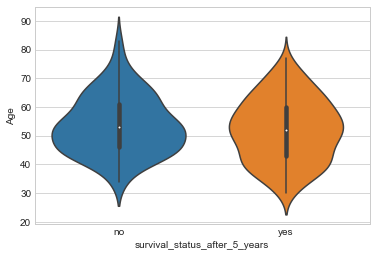

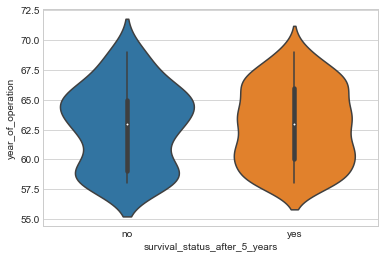

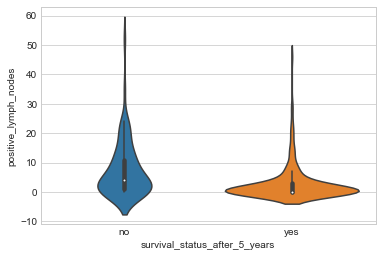

In [73]:
#Violin Plots
#Violin plots are combination of box plots and Probability density function

sns.violinplot(x='survival_status_after_5_years',y='Age',data=Haberman_data,size=8)
plt.show()
sns.violinplot(x='survival_status_after_5_years',y='year_of_operation',data=Haberman_data,size=8)
plt.show()
sns.violinplot(x='survival_status_after_5_years',y='positive_lymph_nodes',data=Haberman_data,size=8)
plt.show()

In [74]:
#Observations:
# From the above positive_lymph_nodes Violin plot ,we can see the patients survived who had lymph_nodes between 0 to 5.

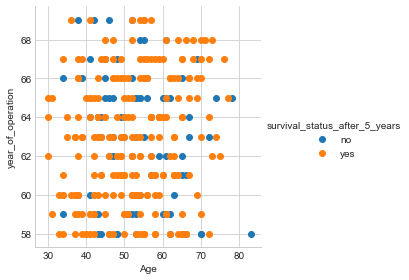

In [75]:
#Multi-Variate Analysis - 2D Scatter Plots

sns.set_style("whitegrid")
sns.FacetGrid(Haberman_data, hue="survival_status_after_5_years", size=4).map(plt.scatter, "Age", "year_of_operation").add_legend();
plt.show()

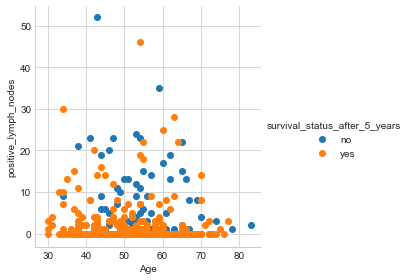

In [76]:
sns.set_style("whitegrid")
sns.FacetGrid(Haberman_data, hue="survival_status_after_5_years", size=4).map(plt.scatter, "Age", "positive_lymph_nodes").add_legend();
plt.show()

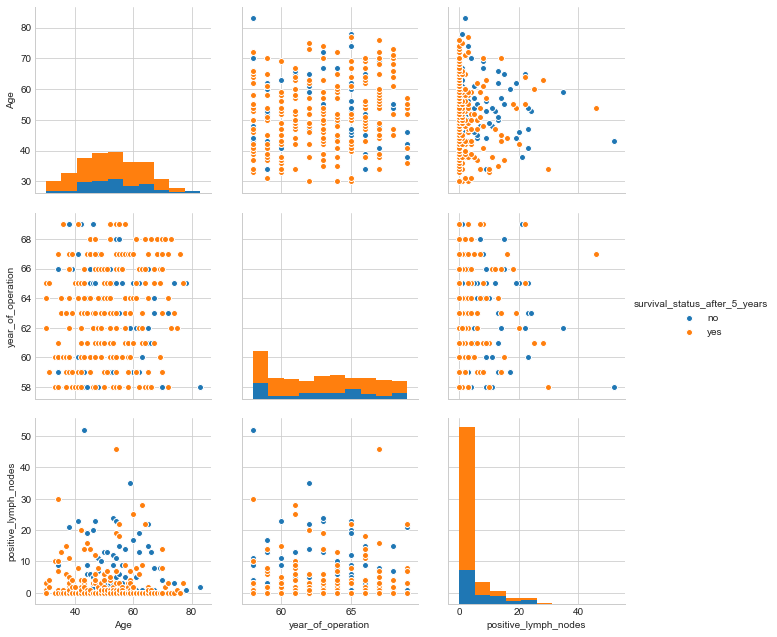

In [77]:
#Multi-Variate Analysis
#Pair - Plots 
sns.set_style("whitegrid")
sns.pairplot(Haberman_data,hue='survival_status_after_5_years',size=3)
plt.show()

In [80]:
#Conclusion:
    
# From the above pair-plots ,we can see better seperation between year of operation and positive lymph nodes 
# Positive lymph nodes and year of operation are main features of the data set.
# More than 50% of patients survived who had lymph_nodes between 0 to 5 and around 11-12% of patients who had more than 5 nodes
